<a href="https://colab.research.google.com/github/Anisha-Tasneem/Phishing-Email-Detection/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess & Model Train

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import psutil
import time

# Function to get current CPU and RAM usage
def get_resource_usage():
    cpu_usage = psutil.cpu_percent()
    ram_usage = psutil.virtual_memory().used / 1e9  # convert to GB
    return cpu_usage, ram_usage

# Step 1: Record CPU and RAM usage before data loading and preprocessing
cpu_before, ram_before = get_resource_usage()

# Step 2: Load the dataset
start_time_data_loading = time.time()
df = pd.read_csv('/content/drive/MyDrive/CSE445/Phishing_Email.csv')

# Step 3: Handle missing values (NaNs) in Email Text column
df['Email Text'].fillna('', inplace=True)  # Replace NaNs with empty strings

# Step 4: Clean the email text
df['Email Text'] = df['Email Text'].str.lower().str.replace('[^\w\s]', '')

# Step 5: Convert the email text into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Email Text'])

# Step 6: Encode the email type labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Email Type'])

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Record time taken for preprocessing
end_time_preprocessing = time.time()

# Step 9: Record CPU and RAM usage after preprocessing
cpu_after_preprocessing, ram_after_preprocessing = get_resource_usage()

# Step 10: Train the SVM model
start_time_training = time.time()
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
end_time_training = time.time()

# Step 11: Record CPU and RAM usage after training
cpu_after_training, ram_after_training = get_resource_usage()

# Step 12: Predict using the trained model
start_time_evaluation = time.time()
y_pred = svm_model.predict(X_test)
end_time_evaluation = time.time()

# Step 13: Record CPU and RAM usage after evaluation
cpu_after_evaluation, ram_after_evaluation = get_resource_usage()

# Step 14: Print resource usage and other metrics
print(f'CPU usage before data loading: {cpu_before}%')
print(f'RAM usage before data loading: {ram_before:.2f} GB')
print(f'CPU usage after preprocessing: {cpu_after_preprocessing}%')
print(f'RAM usage after preprocessing: {ram_after_preprocessing:.2f} GB')
print(f'CPU usage after training: {cpu_after_training}%')
print(f'RAM usage after training: {ram_after_training:.2f} GB')
print(f'CPU usage after evaluation: {cpu_after_evaluation}%')
print(f'RAM usage after evaluation: {ram_after_evaluation:.2f} GB')
print(f'Total data loading time: {start_time_data_loading - start_time_data_loading:.2f} seconds')
print(f'Total preprocessing time: {end_time_preprocessing - start_time_data_loading:.2f} seconds')
print(f'Total training time: {end_time_training - start_time_training:.2f} seconds')
print(f'Total evaluation time: {end_time_evaluation - start_time_evaluation:.2f} seconds')
print(f'Overall runtime: {end_time_evaluation - start_time_data_loading:.2f} seconds')
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

CPU usage before data loading: 40.6%
RAM usage before data loading: 1.34 GB
CPU usage after preprocessing: 76.8%
RAM usage after preprocessing: 1.57 GB
CPU usage after training: 69.4%
RAM usage after training: 1.57 GB
CPU usage after evaluation: 53.9%
RAM usage after evaluation: 1.57 GB
Total data loading time: 0.00 seconds
Total preprocessing time: 9.61 seconds
Total training time: 26.51 seconds
Total evaluation time: 5.33 seconds
Overall runtime: 41.45 seconds
Accuracy: 97.08%


In [5]:
!pip install scipy

# Hyper-parameter space exploration

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import psutil
import time
from scipy.stats import uniform # Import the uniform function from scipy.stats
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'C': uniform(0.1, 100),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform RandomizedSearchCV for SVM
svm_model = SVC(random_state=42)
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', verbose=2, random_state=42)

start_time_random = time.time()
random_search.fit(X_train, y_train)
end_time_random = time.time()

# Get the best parameters and cross-validation accuracy
best_params = random_search.best_params_
best_cv_accuracy = random_search.best_score_

# Evaluate the best model on the test set
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_random)

# Print best parameters and results
print("RandomizedSearchCV:")
print(f'Best Hyperparameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_cv_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ....C=37.55401188473625, gamma=scale, kernel=linear; total time=  31.8s
[CV] END ....C=37.55401188473625, gamma=scale, kernel=linear; total time=  17.4s
[CV] END ....C=37.55401188473625, gamma=scale, kernel=linear; total time=  16.9s
[CV] END .....C=73.2993941811405, gamma=scale, kernel=linear; total time=  16.8s
[CV] END .....C=73.2993941811405, gamma=scale, kernel=linear; total time=  16.7s
[CV] END .....C=73.2993941811405, gamma=scale, kernel=linear; total time=  17.1s
[CV] END ...C=15.701864044243651, gamma=scale, kernel=linear; total time=  17.5s
[CV] END ...C=15.701864044243651, gamma=scale, kernel=linear; total time=  16.6s
[CV] END ...C=15.701864044243651, gamma=scale, kernel=linear; total time=  17.7s
[CV] END .....C=5.908361216819946, gamma=auto, kernel=linear; total time=  16.8s
[CV] END .....C=5.908361216819946, gamma=auto, kernel=linear; total time=  16.3s
[CV] END .....C=5.908361216819946, gamma=auto, k

# Learning curve

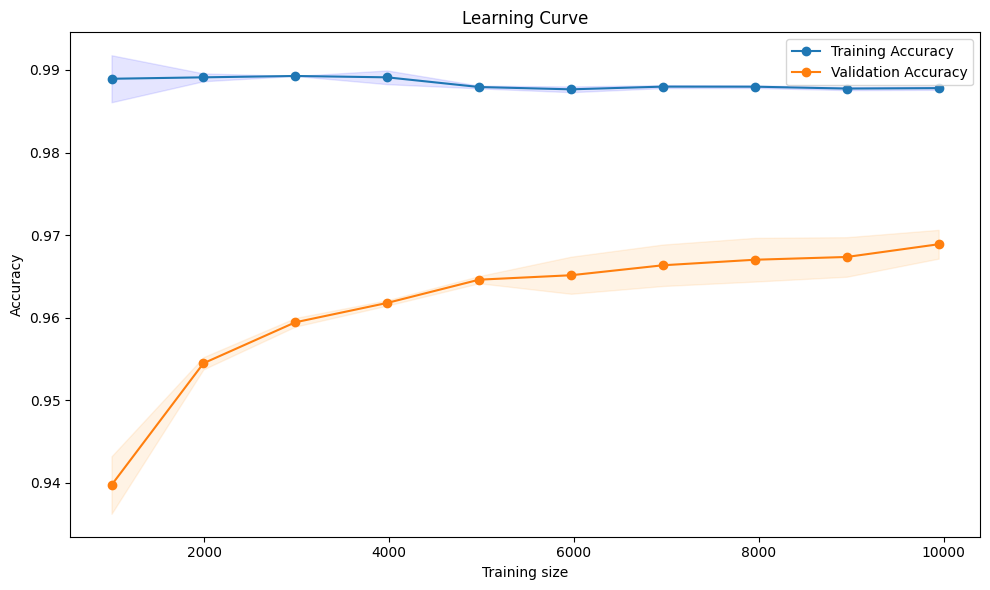

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import psutil
import time
from scipy.stats import uniform # Import the uniform function from scipy.stats
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define the SVM classifier
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Define the training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 evenly spaced training set sizes from 10% to 100% of the dataset

# Compute learning curve values
train_sizes_abs, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, train_sizes=train_sizes, cv=3, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy')

# Plot the mean training and test scores
plt.plot(train_sizes_abs, train_scores_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes_abs, test_scores_mean, label='Validation Accuracy', marker='o')

# Plot the shaded area around the mean scores for variance
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='darkorange')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Effects of the regularizers

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


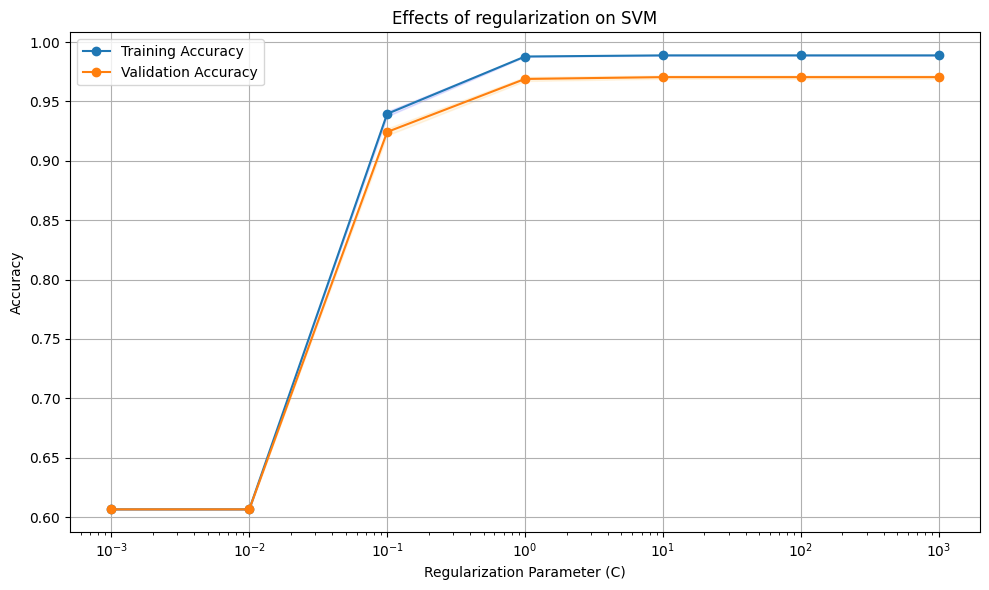

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import psutil
import time
from scipy.stats import uniform # Import the uniform function from scipy.stats
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Define the range of values for the regularization parameter C
param_range = np.logspace(-3, 3, 7)  # Example range from 0.001 to 1000

# Define the SVM classifier
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)

# Compute validation curve values
train_scores, test_scores = validation_curve(svm_model, X_train, y_train, param_name="C", param_range=param_range, cv=3, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.title('Effects of regularization on SVM')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')

# Plot the mean training and test scores
plt.semilogx(param_range, train_scores_mean, label='Training Accuracy', marker='o')
plt.semilogx(param_range, test_scores_mean, label='Validation Accuracy', marker='o')

# Plot the shaded area around the mean scores for variance
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='orange')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.grid()
plt.show()

# Accuracy, Precision, Recall, f1-score

In [16]:
from sklearn.metrics import classification_report

# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.96      0.97      0.97      1457
    Safe Email       0.98      0.98      0.98      2273

      accuracy                           0.97      3730
     macro avg       0.97      0.97      0.97      3730
  weighted avg       0.97      0.97      0.97      3730



# Confusion Metrix

<Figure size 800x600 with 0 Axes>

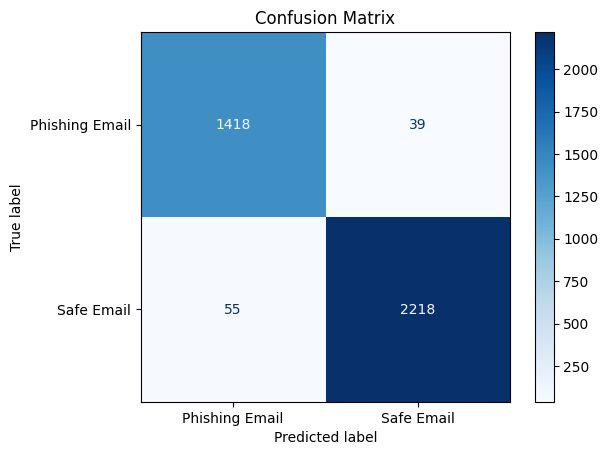

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels for display
class_names = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# AUC ROC

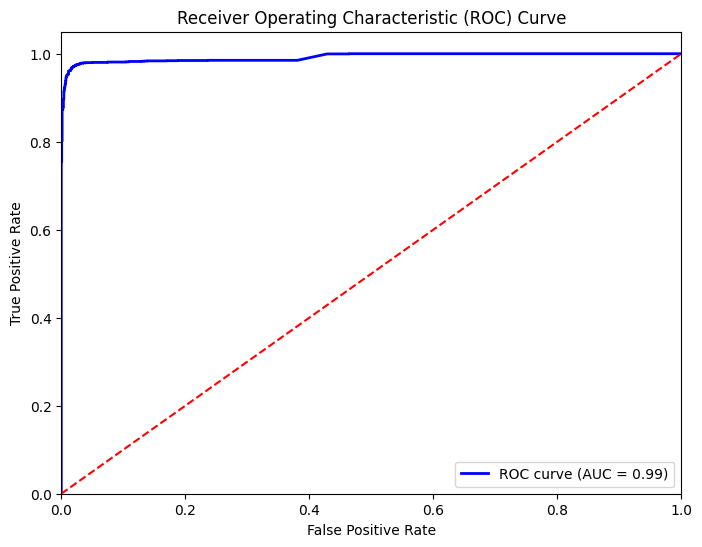

In [22]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Re-initialize the SVM model with probability estimation enabled
svm_model = SVC(kernel='rbf', gamma='scale', random_state=42, probability=True)

# Fit the model to the training data (assuming X_train and y_train are already defined)
svm_model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = svm_model.predict_proba(X_test)
y_prob = y_prob[:, 1]  # Keep probabilities of the positive class only

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# CPU RAM

In [1]:
import psutil

# Get CPU usage
cpu_usage = psutil.cpu_percent()
print(f'CPU Usage: {cpu_usage}%')

# Get memory usage
memory_info = psutil.virtual_memory()
print(f'Total Memory: {memory_info.total} bytes')
print(f'Used Memory: {memory_info.used} bytes')
print(f'Free Memory: {memory_info.available} bytes')

# Get GPU information (if available)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

CPU Usage: 72.4%
Total Memory: 13609435136 bytes
Used Memory: 946253824 bytes
Free Memory: 12332539904 bytes


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13016286481553431401
 xla_global_id: -1]